# Chapter 2. End-to-End Machine Learning Project
#### - 예제를 통해 전반적인 기계학습 과정 이해 

## <기계학습의 주요단계>
#### 1. 큰 그림(전체상황) 보기 
#### 2. 데이터 얻기 
#### 3. 통찰력을 얻기 위해 데이터 탐색 및 시각화
#### 4. 기계학습 알고리즘을 위한 데이터 준비 
#### 5. 모델 선택과 학습
#### 6. 모델 미세 조정 
#### 7. 해결책 제시 
#### 8. 시스템 실행, 모니터링, 유지 

### Working with Real Data
#### - 실험 시, 인공데이터 보단 실제 데이터를 사용해 실험하는 것이 좋음
#### - 다양한 오픈데이터셋 존재 
#### - 이번 장에서는 1990년 캘리포니아 인구조사에 기초한 주택가격 데이터 사용 
<img src = "image\California housing prices.png">

## 1. Look at the Big Picture

#### - 캘리포니아 인구조사 데이터(인구, 소득-주택가격의 중앙값, 구역 등)를 통한 주택가격 모델 만들기
#### - 생성되는 모델은 어느 구역에서든 그 구역의 주택가격 중앙값을 예측할 수 있어야 함 

### ※ Machine Learning Project Checklist (Appendix B) - 499p
#### - 상황에 따라 단계 수정 및 추가해서 진행

### 1) Frame the Problem
#### - 사업목적이 무엇인지 파악 
- 생성할 모델을 어떻게 사용하고 무엇을 얻을 것인가 
    - 모델의 예측값(주택가격 중앙값)은 다른 후속의 기계학습 모델에 사용될것 
    
    - 이 후속 모델은 해당 구역의 투자가치 여부를 파악할 것 

#### ※ Pipelines 
<img src = "image\pipeline.png">

 - 데이터 처리 요소의 연속(sequence)

  - 기계학습은 많은 데이터를 조작, 변형해야하기 떄문에 pipeline을 매우 일반적으로 사용  
 - 특징 
    - 비동기적 수행 : 각각의 요소들은  데이터를 가져와 처리하고 다른 데이터 창고에 결과값을 보냄 (반복) 
    - 독립적으로 수행 : 각 요소들간  관계는 단지 데이터창고. (시스템 쉽게 파악 가능, 한 요소에 문제가 생겨도 잠깐이라도 유지 가능) 





#### - 현재 해결책 파악(있을 경우) 
- 해결에 대한 통찰력 제공 
     - 현재 주택가격은 전문가에 의해 복잡한 규칙을 사용하여 직접 수동적으로 측정되고 있다 

#### - 시스템 설계 틀 만들기 
- 지도학습 사용 : 라벨화된 데이터 존재 (구역마다의 주택가격중앙값)
- 회귀분석 사용 : 값을 예측해야함 (예측을 위해 여러 변수가 필요하기 때문에 다변수 회귀분석)
- batch(offline)학습 사용 : 연속적인 데이터가 들어오는 시스템이 아님 

### 2) Select a Performance Measure 
#### - 성능 측정 방법 선택 
- 평균제곱근편차(RMSE)사용 
    - 일반적으로 회귀문제에서 자주 사용 
    - 유클리드 거리 측정방식 사용 
    - RMSE이 50000이면, 예측값의 68%가 50000안에 속함, 95%는 100000안에 속함
    - <img src = "image\rmse.png">
    - m : 데이터의 개수 
    - x^(i) : 데이터 셋에서 i번째의 모든 특징값들의 벡터 (라벨값은 제외)
    - <img src = "image\rmse 2.png">
      - 구역 1의 경도, 위도, 거주민, 소득중앙값 
      - 라벨값 (주택가격 중앙값)
    - <img src = "image\rmse 3.png">
      - X : 데이터의 모든 특징의 행렬 
    - h : 예측함수 
    - 예측오류 : 예측값 - 라벨값
    - RMSE(X, h) : 가설 h를 이용하여 데이터를 측정하기위한 cost 함수 
            

 - MAE (평균 절대값 오차) 
     - 이상치 구역이 있을 경우 RMSE보다 MAE 사용
     - <img src = "image\MAE.png">
     - 맨하탄거리 측정방식 사용 

### 3) Check the Assumptions
#### - 가설(예상) 확인하기 
- 예측해야할 값이 숫자 데이터인 가격이 맞는지, 카테고리를 요구하는 것이 아닌지 
- 우리의 출력값을 사용할 후속 시스템 담당 팀원들에 어떤 종류의 값이 필요한지 확인 

## 2. Get the Data

### 1) Create the Workspace
#### - Jupyter notebook 설치 

### 2) Download the Data
#### - 보통 데이터는 관계형 데이터베이스(혹은 이외의 데이터 창고)에서 접근 가능
#### - 접근을 위해선 먼저 인증 정보, 접근 권한 확보가 필요 
- 예) 구분자가 , 인 housing.csv 파일을 포함한 housing.tgz 압축파일 다운

#### - 데이터가 바뀌어도 쉽게 불러올 수 있도록 함수 설계 

In [2]:
import os
import tarfile #tar파일을 읽어오기위해 
from six.moves import urllib 
#six.moves - 수정없이 모든 버전(python2, 3)에서 작동하도록 
#urllib - 파이썬에서 인터넷 자원에 접근할 수 있도록 도와줌 

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" #파일이 있는 주소 
HOUSING_PATH = "datasets/housing" #컴퓨터에서 존재할 파일의 위치
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz" #파일의 url

In [4]:
#데이터 다운받는 함수 
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):  #경로에 디렉토리가 없을경우 새로 생성
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") #tgz파일의 경로와 이름 
    urllib.request.urlretrieve(housing_url, tgz_path) #url이 가리키는 주소에 접근해서 해당 자원을 로컬컴퓨터에 저장, tgz_path에 저장된 경로와 이름으로 저장 
    housing_tgz = tarfile.open(tgz_path) #파일 열기(입축해제) (default = read)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data() #디렉토리에 datasets/housing 데이터가 생성됨 

In [6]:
import pandas as pd

In [7]:
#pandas.read_csv로 csv파일 불러오기 
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 3) Take a Quick Look at the Data Structure
#### - 데이터 구조 전체적으로 훑어보기

In [8]:
housing = load_housing_data()
housing.head() 
# housing데이터의 앞의 5개 데이터 출력 
# 각 행은 하나의 구역 
# 각 열은 속성 (총 10개의 속성) 
# -경도, 위도, 나이중앙값, 총 방개수, 총 침실개수, 
# -인구수, 가정수, 소득 중앙값,주택가격 중앙값, 해변 근접정도

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()
# 데이터의 전체적인 정보 
# 20640 구역, 10개의 속성
# total_bedrooms 207개 데이터 누락 
# ocean_proximity를 제외한 데이터는 float64
# ocean_proximity는 string(object) 위의 데이터를 통해 카테고리 값임을 추측 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
#카테고리 여부와 카테고리별 데이터 개수 파악 
#총 5개의 카테고리 데이터
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()
#count(개수), mean(평균), std(표준편차), min(최소값), max(최대값)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- 주의해야할 것은 null값은 개수에 포함되지 않음 (total_bedrooms)
- 25%, 해당 백분위수 백분위수는 관찰 그룹에서 관찰된 관찰 비율의 퍼센트를 나타내는 값
- 구역의 25%의 나이중앙값은 18세이하, 50%는 29세이하, 75%는 37세이하

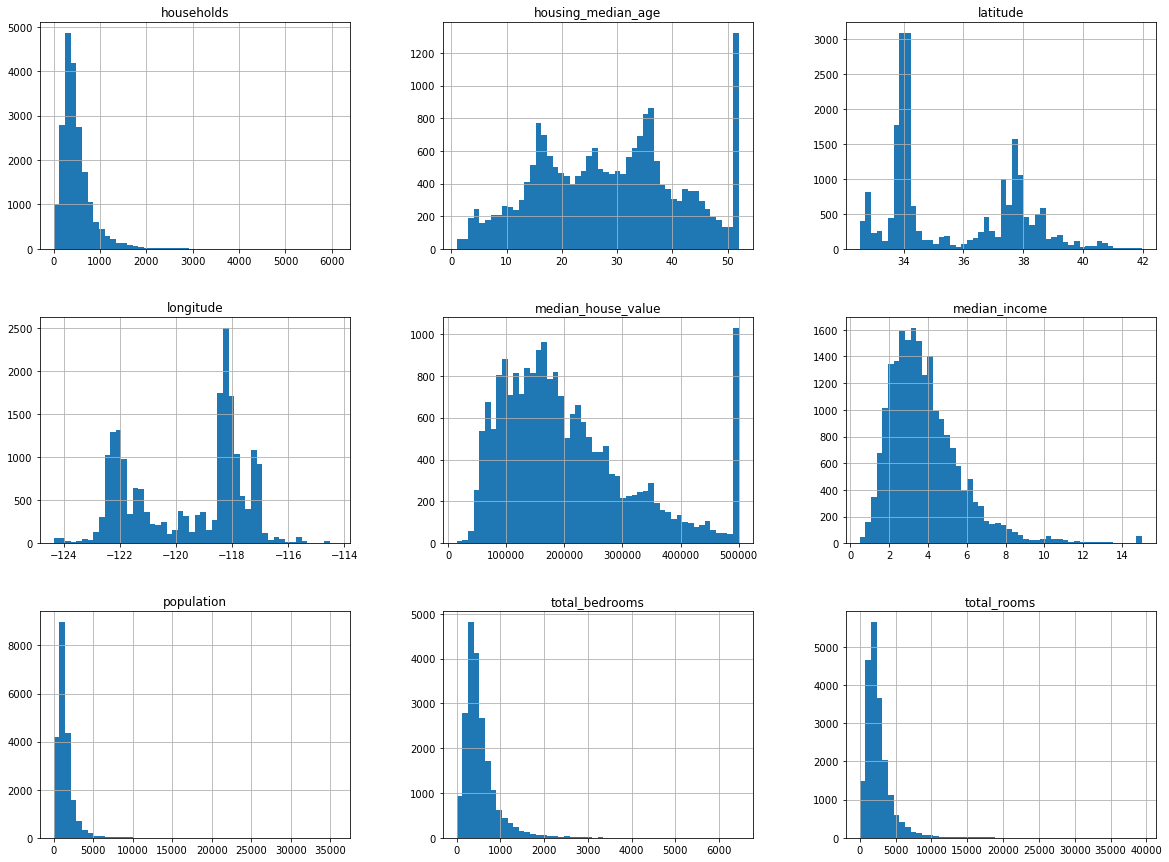

In [12]:
#데이터를 빠르게 파악할 수 있도록 숫자형속성에 대해 히스토그램 생성  
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

- 소득 중앙값이 US 달러로 표현되지 않았다
- 고소득은 15를 상한 처리, 저소득은 0.5를 한도로 처리했다
- 나이 중앙값과 주택 가격 중앙값 또한 상한 처리했다
    - 출력결과를 사용할 팀에게 문제여부를 파악해야함
    - 문제라고 여기면, 상한처리된 데이터를 다시 조사하거나 데이터에서 삭제해야 함 
- 속성들 값의 척도가 다 다르다 
- 여러 그래프가 오른쪽으로 치우쳤다
    - 데이터의 편향은 기계학습 알고리즘의 패턴 파악에 어려움을 줄 수 있음 

### 4) Create a Test Set
#### - 과적합 문제를 피하기 위해 train set과 test set을 나누어서 학습해야 함
#### - 보통 랜덤하게 20%의 데이터를 test set으로 설정 

In [13]:
import numpy as np

In [14]:
#데이터 나누는 함수 
def split_train_test(data, test_ratio): # test_ratio : test set으로 설정할 데이터 비율
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2) #test set 20%로 설정 
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


- 문제점 : 프로그램을 새로 실행할때마다 새로운 값이 생성된다 
    - 첫번째 실행했을때의 데이터를 저장해놓고 사용 
    - random seed값 설정 (항상 같은 랜덤값이 생성되도록)

 - 문제점 : 데이터셋을 업데이트 했을 때 문제가 생긴다
     - 각각의 데이터에 test set에 속할지 여부를 정하는 식별자를 사용 
     - 식별자로 hash 사용 
         - 키에 따른 값이 있는 데이터 구조 
         - 사전(dict)와 같은 구조라 파악 

In [16]:
import hashlib

In [17]:
#[-1]의 경우 리스트이 가장 끝을 의미함 
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
#id를 통해 테스트 데이터와 학습용 데이터로 구분 
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

- 위의 방식으로 진행하기에는 hosuing 데이터에는 식별에 사용할 유일한 값이 없다
- 그래서 간단한 방법으로 row의 인덱스 번호를 식별자로 사용

In [19]:
#id(인덱스 번호)를 가진 housing 데이터 생성
housing_with_id = housing.reset_index()  #'index'열 추가 
#reset_index() : 인덱스를 하나의 열로 데이터프레임의 가장 앞에 삽입 

housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
#index를 활용해 train set과 test set 나누기 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

 - 이 방법을 사용하기 위해서 보장되어야 할 조건
     - 가장 최근에 추가된 데이터가 마지막 인덱스 번호를 가져야 함 
     - 어떠한 행도 삭제되면 안됨 
     
     
 - 대신 변경될 가능성이 가장 낮은 경도, 위도를 식별자로 사용할 수 있음 

In [21]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [22]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

#### - scikit-learn의 train_test_split() 함수 사용하기

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### - 계층화 샘플링
- 랜덤하게 샘플된 데이터가 전체 데이터를 대표할 수 있을지 의문 
- strata라고 불리우는 각 그룹에 일치하는 비율로 데이터 샘플링 
    - (예) 여자가 52%, 남자가 48%인 미국인구를 계층화 샘플링 할 때 비율에 맞춰 데이터를 얻는다 
- 데이터 편향을 막을 수 있음 

- 예) 전문가 : 소득의 중앙값이 주택 가격 중앙값을 예측하기 위해서 중요한 요소이다.
- 그렇다면 test set의 데이터가 전체 데이터셋의 다양한 소득 데이터를 대표해야 함 

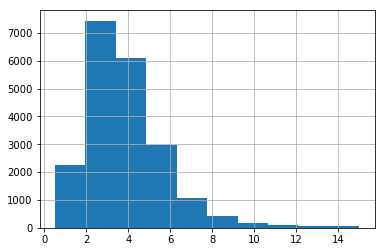

In [24]:
#소득 중앙값 데이터의 히스토그램
housing['median_income'].hist()
plt.show()
#대부분의 소득 값이 2~5에 편향되어 있다 

- 편향된 데이터 처리 
    - 소득 중앙값을 1.5로 나누고 반올림 처리
    - 5보다 큰 값을 5로 합침

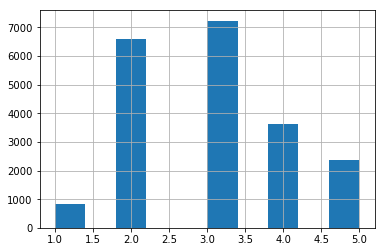

In [25]:
housing["income_cat"] = np.ceil(housing['median_income'] / 1.5)
housing["income_cat"].where(housing['income_cat'] < 5, 5.0, inplace=True)

housing['income_cat'].hist()
plt.show() #고르게 분포된 데이터를 얻음 

#### - 소득 카테고리를 기반으로 계층화 샘플링 수행 
 - Scikit-learn의 StratifiedShuffleSplit 클래스 사용

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
housing['income_cat'].value_counts() / len(housing) #고르게 분포된 데이터 확인 

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

 - 데이터를 원상태로 돌리기위해 'income_cat' 속성 삭제 

In [28]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

#### - test set 생성은 기계학습 프로젝트에서 간과해서는 안될 부분 

## 3. Discover and Visualize the Data to Gain Insights
#### - 지금까지는 전반적인 데이터 구조와 test set의 구성에대해 알아봄 
#### - 이제 조금 더 자세히 알아보는 단계 
#### - train set 만 사용할 것 

In [29]:
hosuing = strat_train_set.copy()

### 1) Visualizing Geographical Data 
#### - 경도, 위도를 사용한 지리적 데이터를 산포도로 표현 

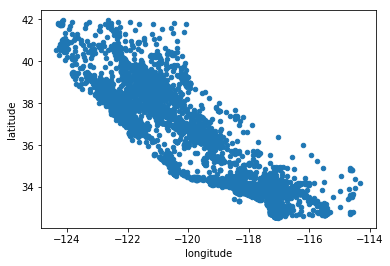

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude')

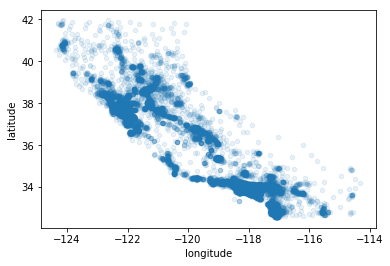

In [31]:
#밀집 지역의 정보를 알아보기 힘들어 투명도 조정 
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

 - LA, San Diego 등 부분에 밀집되어 있는 것을 알 수 있음 

#### - 주택가격에 대한 산포도 그래프
- 옵션 s = 구역별 인구
- 옵션 c = 가격을 색으로 표현 
- 옵션 cmap = 이미 정의된 colormap인 jet 사용 (가격이 높을수록 빨간색, 낮을수록 파란색)

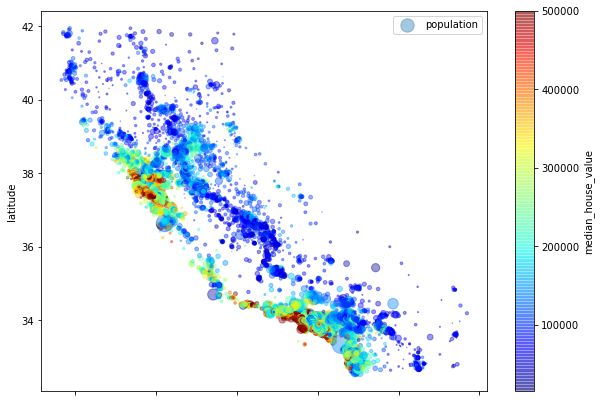

In [32]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100,label='population', figsize=(10, 7), 
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

 - 주택가격은 인구밀도와 위치(해변근접도)와 관련성이 높다
      - 이것은 클러스터링 알고리즘을 사용하여 주요 클러스터를 감지하고, 클러스터 센서의 근접성을 측정하는 새로운 속성을 추가하는데 있어 유용하게 적용될 수 있다

### 2) Looking for Correlations
#### - 데이터의 크기가 매우 크지 않기 때문에 모든 속성들간의 표준 상관 계수 파악이 가능
#### - corr() 함수 사용 

In [33]:
corr_matrix = housing.corr()

- 각 특징들과 주택가격 중앙값과의 상관관계 파악 

In [34]:
corr_matrix['median_house_value'].sort_values(ascending=False) #내림차순

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### - 상관계수
- <img src = "image\correlation.png">
- 상관계수의 범위는 -1 ~ 1
- 1에 가까울수록 강한 양의 상관관계, -1에 가까울수록 강한 음의 상관관계를 나타냄
- 0에 가까울수록 상관관계가 없음을 의미 
- 선형 상관관계만을 측정할 수 있음 

#### - 속성들 간 상관관계를 파악하기 위한 다른 방법인 산포도 행렬
- pandas의 scatter_matrix 사용 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025573F0C278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025573BCE710>]], dtype=object)

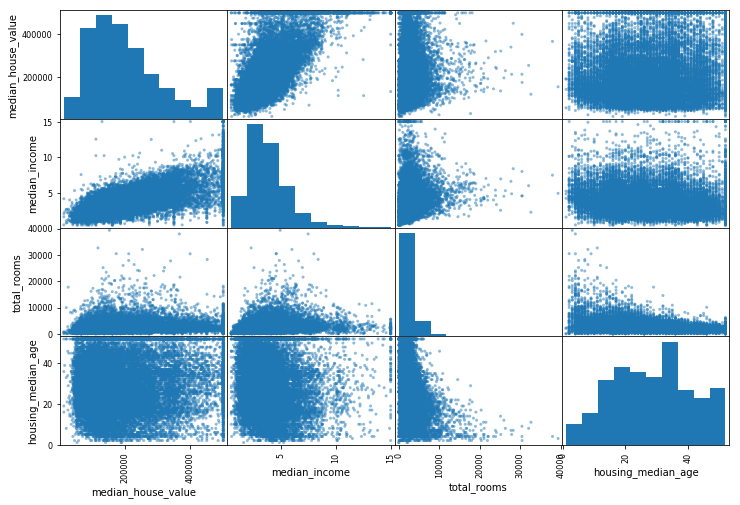

In [35]:
from pandas.plotting import scatter_matrix
#현재는 pandas.tools.plotting 대신 pandas.plotting 사용

#모든 속성의 상관관계를 표현하여 그래프 양이 많아지기 때문에 몇 개의 속성만 표현 
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))

 - 위의 데이터에서 주택가격 중앙값과 상관관계가 가장 높았던 것은 소득 중앙값 
 - 두 속성간의 산포도 자세히 살펴보기  

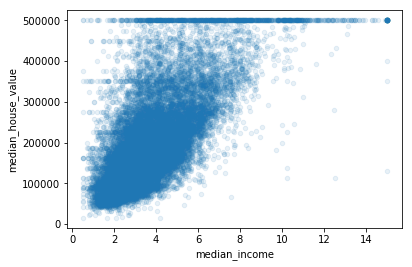

In [36]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

#### - 주택가격 중앙값과 소득 중앙값의 상관관계
 - 강한 상관관계를 보임 (양의 상관관계, 점들이 멀리 퍼져있지 않음)
 - 위에서 언급한 것과 같이 500000달러 이상의 값들은 500000으로 상한처리됨 
 - 하지만 45만달러, 35만달러, 28만달러 등에서도 수평선으로 보이는 것이 보임
     - 알고리즘이 이러한 데이터 이상점을 학습하는 것을 방지하기위해 해당 구역을 제거할 수 있다

### 3) Experimenting with Atrribute Combinations
#### - 다양한 속성들을 조합해보기 
- 가구당 방의 개수 
- 총 방의 개수에서 침실 개수의 비율 
- 가구당 인구 

In [37]:
#가구당 방 개수 
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

#방 개수에서 침실 개수 비율 
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

#가구당 인구수 
housing['population_per_household'] = housing['population']/housing['households']

In [38]:
#추가된 속성들과 주택가격 중앙값의 상관관계 
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

 - 방 개수당 침실의 개수가 그냥 방의 개수나 침실의 개수보다 상관관계가 높음
     - 침실 개수의 비율이 낮은 집이 가격이 더 높음으로 해석 가능 
 - 가구당 방의 개수 또한 총 방개수 보다 상관관계가 높음 

## 4. Prepare the Data for Machine Learning Algorithms
#### - 기계학습 알고리즘을 위한 데이터를 준비하는 단계 
#### - 함수를 사용하여 데이터를 준비함 
- 새로운 데이터나 프로젝트에 재사용 가능 
- 다양한 변환 방법과 여러 조합을 통해 최적의 변환을 찾아낼 수 있음 

#### - 먼저 깨끗한 train set 준비 
- 라벨값(주택가격 중앙값)은 변환에 사용하지 않을것임으로 제거해서 준비 

In [39]:
housing = strat_train_set.drop('median_house_value', axis=1) #라벨값 제거 
#drop은 복사본을 생성해 원본데이터에 영향을 끼치지 않음 

housing_labels = strat_train_set['median_house_value'].copy()

### 1) Data Cleaning
#### ※ Scikit-leaarn 설계
- Scikit-learn의 구성은 잘 설계되어 있음
- 일관성 : 모든 객체는 일관적이고 간단한 인터페이스 공유
    - 추정자(estimator) : 모든 데이터는 추정자에 의해 파라미터들을 추정(측정)할 수 있음 
    - 변형자(transformer) : 몇몇의 추정자는 데이터를 변형할 수 있음 
    - 예측자(prediction) : 몇몇의 추정자는 데이터에 대한 예측값을 생성할 수 있음 
- 점검 
    -
- 클래스의 확산 방지 : 데이터는 클래스가 아닌 numpy 배열, sparse 행렬로 표현 
- 구성: 생성해놓은 것 재사용 가능 
- 합리적인 기본값 : 빠르게 생성이 가능하도록 합리적인 기본값으로 구성되어있음 


#### - 대부분의 기계학습 알고리즘은 누락된 특징값들에 대해 잘 작동하지 않아 조치 필요
- hosuing 데이터의 total_bedrooms에는 누락된 데이터 존재 (207개)

#### - 수정하기 위한 3가지 옵션 
- 해당 구역 제거하기 
- 전체 속성 제거하기 
- 다른 값으로 누락값 대채하기 

#### - DataFrame의 dropna(), drop(), fillna() 함수를 통해 해결 가능 

In [40]:
#해당 구역 제거
housing.dropna(subset=['total_bedrooms'])

#전체 속성 제거 
housing.drop('total_bedrooms', axis=1)

#다른 값(중앙값)으로 대체하기
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

#### - Scikit-learn의 Imputer 클래스 사용하기 

In [41]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median') #imputer객체를 생성해 누락값을 중앙값으로 대체하도록 지정 

- 중앙값은 숫자로 이루어진 속성에서만 적용됨으로 숫자가 아닌 속성(ocean_proximity)를 제거한 사본을 만들어야함 

In [42]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [43]:
#imputer 객체 적용 
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [44]:
#statistics_ 인스턴스 변수에 계산된 중앙값이 저장됨 
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [45]:
housing_num.median().values #값이 일치함 

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

 - 현재에는 total_bedrooms 속성에만 누락값이 존재하지만, 새로 누락값이 생길 가능성이 있기 때문에 imputer를 모든 속성에 적용하는 것이 안전하다

 - 누락값을 대체한, 즉 변환된 속성들을 데이터로 사용가능 

In [46]:
X = imputer.transform(housing_num)

In [47]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(hosuing.index.values))

### 2) Handling Text and Categorical Attributes
- 위에서 중앙값을 구할 수 없는 카테고리 속성인 ocean_proximity를 제거함 
- 이러한 텍스트 데이터를 숫자 데이터로 변환하기 

#### - Scikit-learn의 LabelEncoder() 함수 사용하기

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_category = housing['ocean_proximity']
housing_category_encoded = encoder.fit_transform(housing_category)
print(housing_category_encoded)
print(encoder.classes_)

[0 0 4 ..., 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [49]:
housing['ocean_proximity'].head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

 - 0 : <1H OCEAN
 - 1 : INLAND
 - 2 : ISLAND
 - 3 : NEAR BAY
 - 4 : NEAR OCEAN
 
#### - 문제점 
- 카테고리 0과 4가 0과 1보다 더 유사함 
    - 바이너리 속성 부여 : 해당 카테고리에 속하면 1, 속하지 않는 카테고리는 0 (카테고리 0 : 10000)

#### - Scikit-learn의 OnehotEncoder 클래스 사용 
- 카테고리 값을 one-hot 벡터로 변환
- fit_transform() 함수는 2차원 배열을 필요로 함으로 데이터 재구성 필요 (housing_cat_encoded는 1차원 배열)

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
#데이터 재구성 
# reshape에서 -1을 지정하는 것은 unspecified를 의미 
# 즉 뒤의 열을 1로 지정하였기 때문에, 데이터의 길이에서 1열로 자연스럽게 변환해준다 
# 파이썬에서는 상당히 유용하게 사용되기 때문에 기억해두자 
housing_category_1hot = encoder.fit_transform(housing_category_encoded.reshape(-1, 1))
housing_category_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

 - 결과가 numpy 배열이 아닌 scipy sparse 행렬
     - one-hot 인코딩된 배열 내에는 수많은 공간을 차지하는 0이 존재 
     - 공간 낭비 방지를 위해 0이 아닌 요소의 위치만 저장하는 sparse 행렬 사용

In [53]:
print(housing_category_1hot[:5]) #1이 위치한 (행, 열)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0


In [54]:
#sparse 행렬을 numpy 배열로 변환하기 
housing_category_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

#### - Scikit-learn의 LabelBinarizer클래스 사용 
- 텍스트 카테고리를 숫자 카테고리로 바꾸고, 그 숫자를 one-hot 벡터로 바꿔줌 
- 위에서 한 변환을 한번에 해 줌 
- 기본값으로 numpy 배열 반환 
    - sparse_output=True 속성을 통해 sparse 행렬 반환 가능

In [55]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_category_1hot = encoder.fit_transform(housing_category)
housing_category_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### 3) Custom Transformers
#### - Scikit-learnㅇ서 제공하는 transformer를 상황에 맞게 수정 

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [60]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 4) Feature Scaling
#### - 데이터 변형에 있어 가장 중요한 방법 중 하나 
#### - 데이터 간 척도 차이가 크면 대체로 기계학습 알고리즘은 제대로 작동하지 않음 
- total_rooms는 6 ~ 39320의 범위를 가지지만 
- median_income은 0.5 ~ 15의 범위를 가짐 

#### - 해결방법 
- Min-max scaling (정규화)
    - 0 ~ 1의 범위로 만들기 
    - 주어진 값에서 최소값을 뺀 것을, 최대값에서 최소값을 뺀 값으로 나눠준다 
    - Scikit-learn에서 MinMaxScaler 제공 (feature_range 하이퍼파라미터로 범위 지정도 가능)


- Standardization (표준화)
    - 주어진 값에서 평균값을 빼고 분산으로 나눠준다 
    - 정해진 범위로 한정되지 않는다 
    - 이상치에 영향을 덜 받는다 
    - Scikit-learn에서 StandardScaler 제공 
    
#### - 모든 변형에 있어 학습 데이터에만 적용해야 함을 주의해라 

### 5) Transformation Pipelines 
#### - 데이터 변환은 일련의 순서를 거쳐 진행됨 
#### - Scikit-learn에서 Pipeline 클래스 제공하여 변환에 도움울 줌 

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")), #이름은 자유롭게 지정 가능 
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

 - Pipeline 생성자는 (이름, 추정자(estimator))가 쌍인 리스트로 구성 
 - 마지막 추정자를 제외하고는 반드시 transformers(fit_transform())을 가져야 함 
 - pipeline.fit() 함수 호출시, 각 호출의 출력값을 매개 변수로 전달해 최종 추정량까지 fit_transform()함수가 순차적으로 호출됨 
 - pipeline은 최종 추정자로써 동일한 함수를 제공 

#### - Scikit-learn의 FeatureUnion 클래스 
- 변환을 담은 pipeline들을 하나로 합쳐줌 
- 숫자 속성을 변환할 pipeline + 카테고리(텍스트)속성을 변환할 pipeline 

 - Scikit-learn에 DataFrame을 다루는 것이 정의되어있지 않음 
 - '선택자'가 DataFrame의 해당 열(숫자속성, 카테고리 속성)을 선택할 수 있도록 정의 
 - 선택한 속성이 아닌 부분은 삭제하여 DataFrame을 numpy 배열로 변환

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names #해당 속성 선택 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [71]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num) #숫자 속성만
cat_attribs = ["ocean_proximity"] #카테고리 속성만 

num_pipeline = Pipeline([  #숫자 속성 pipeline
        ('selector', DataFrameSelector(num_attribs)), #숫자 속성 열만 선택
        ('imputer', Imputer(strategy="median")), 
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([ #카테고리 속성 pipeline
        ('selector', DataFrameSelector(cat_attribs)), #카테고리 속성 열만 선택
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [72]:
#에러발생 
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [74]:
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on thr X input"""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [77]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    #수정
        ('label_binarizer', LabelBinarizerPipelineFriendly()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [78]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## 5. Select and Train a Model
#### - 이전 단계에서 기계학습 알고리즘을 위한 데이터 준비 완료 
#### - 이제 모델을 선택하여 데이터 학습 진행 

### 1) Training and Evaluating on the Training Set
#### - 선형 회귀 모델 

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) #housing_labels : 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- 5개의 데이터에 선형회귀모델 적용

In [85]:
#데이터 5개 준비
some_data = housing.iloc[:5] 
some_labels = housing_labels.iloc[:5]
#데이터에 변환 적용 
some_data_prepared = full_pipeline.transform(some_data)

#예측값과 정답값 출력
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


 - 작동은 하지만 예측값이 정확하지는 않음 
 - 전체 학습 데이터에 대해 회귀모델의 RMSE(평균제곱근오차) 측정하기 
     - Scikit-learn의 mean_squared_error()함수 사용 

In [86]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

 - 예측오차가 약 68628 달러 
 - 대부분 구역의 주택가격 중앙값은 12만 달러에서 26만5천달러, 적은 오차는 아님 
 
 
 - underfitting 발생
     - 좋은 예측을 위한 충분한 데이터가 제공되지 않음 
     - 모델이 강력하지 않음 
 - 해결 
     - 더 강력한 모델 사용 
     - 더 좋은 특징들로 학습 알고리즘 사용 
     - 모델의 제약 줄이기 

 - 더 강력한(복잡한) 모델 사용하기 
     - 의사결정회귀트리 사용 

In [87]:
from sklearn.tree import DecisionTreeRegressor #의사결정회귀트리 불러오기

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [89]:
housing_predictions = tree_reg.predict(housing_prepared) #예측값

#RMSE측정
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

 - 예측오차가 0 
 - overfitting 발생 
 
 
 - 확신할 수 있는 모델이 생성되기 전까지 우리는 테스트 데이터를 건드리지 않아야함으로, 학습 데이터의 일부를 학습용, 나머지를 모델 검증용으로 사용해야함 

### 2) Better Evaluation Using Cross-Validation
#### - 학습데이터 나누기 
- train_test_split() 함수를 활용해 학습데이터를 학습용과 검증용으로 나눔 
- 학습용 셋으로 모델 학습 후 검증용 셋으로 모델 검증 


- Scikit-learn의 cross_validation 특징 사용하기 
    - k fold cross-validation
        : k개의 subset으로 학습데이터 분리, 매번 다른 subset으로 검증하고 나머지로 학습 

In [95]:
from sklearn.model_selection import cross_val_score

#10 fold cross-validation
#매번 다른 subset으로 검증, 나머지 9개로 학습 
#결과적으로 10개의 평가점수를 포함한 배열 반환 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

 - -scores 
     - Scikit-learn의 cross-validation은 cost function보다 utility function을 기대 
     - cost functoin은 낮을수록 좋음, utility function은 높을수록 좋음 
     - 즉, (R)MSE와 반대라 - 를 줌

In [94]:
#RMSE확인
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 70232.0136482   66828.46839892  72444.08721003  70761.50186201
  71125.52697653  75581.29319857  70169.59286164  70055.37863456
  75370.49116773  71222.39081244]
Mean: 71379.0744771
Standard deviation: 2458.31882043


 - 예측오차의 평균이 71378달러 (선형회귀모델보다 나쁨)
 
 - 교차검증은 모델의 성능측정 뿐 아니라 추정치의 정확성(표준편차)도 측정할 수 있음 
 - 여러 검증용 데이터를 통해 여러 정보를 알 수 있음 
     - 하지만 여러 번 모델을 훈련시켜 비용이 발생해, 항상 사용할 수 있는것은 아님
 

- 선형회귀 모델에도 10 fold cross-validation 적용

In [97]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


 - 결정트리 모델이 선형회귀 모델보다 성능이 나쁜것을 확인할 수 있음 

#### - Random Forest 모델에 적용해보기
- 임의의 특징으로 여러 결정트리 모델을 학습하고 예측값의 평균을 냄 
- 다른 여러 모델들을 결합하는 것을 앙상블 학습이라 함 

In [100]:
from sklearn.ensemble import RandomForestRegressor

#위의 작업과 동일하게
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

#10fold cross-validation 적용 
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 51650.94405471  48920.80645498  52979.16096752  54412.74042021
  50861.29381163  56488.55699727  51866.90120786  49752.24599537
  55399.50713191  53309.74548294]
Mean: 52564.1902524
Standard deviation: 2301.87380392


 - 더 나은 성능을 보이지만 여전히 학습용셋의 점수가 검증용셋의 점수보다 낮음 
 - 여전히 과적합되어있음 
 - 다른 해결방법 사용 필요 

#### - pickle, sklearn.externals.joblib를 통해 실험에 사용한 모든 모델 저장 가능
- 하이퍼파라미터와 학습파리미터 모두 저장 가능 
- 모델 별 성능, 에러 종류 비교에 유용 

## 6. Fine-Tune Your Model
#### - 모델들 미세조정하기 (유망한 모델들에 대한 리스트 작성했다고 가정)

### 1) Grid Search
#### - 미세조정 방법 
 - 하이퍼파라미터의 최적 조합을 찾을 때까지 하이퍼파라미터를 직접 조작해야 함 
     - 모든 조합을 탐색하기에는 시간이 오래걸림 
     
#### - Scikit-learn의 GridSearchCV 사용 
- 어떤 하이퍼파라미터를 실험할 것인지, 어떤 값을 시도할 것인지 넘기면 가능한 하이퍼파라미터 조합 측정 
     - 랜덤포레스트 회귀 모델에서 최적의 파라미터 조합 찾기 

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
   {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

 - 첫번째 사전: (3*4) 12개의 하이퍼파라미터 조합 
 - 두번째 사전 : (2*3) 6개의 하이퍼파라미터 조합 (bootstrap = Fasle : 부트스트랩 샘플을 생성하지 않음) 
 - 총 18개의 조합에서 5겹 교차 검증 --> (18 * 5) 90번의 학습 진행 
 - 자세한 내용은 7장에서 다룰 예정

In [105]:
#최적의 조합 
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

 - 위 조합이 최대값으로 측정되었지만 더 높은 값으로 시도해보면 더 좋은 성능을 얻을수도 있다

In [107]:
#최적의 측정자를 직접 볼 수도 있음 
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

 - GridSearchCV가 refit=True로 설정된 경우, 교차검증을 통해 최적의 조합을 찾았을때 전체 학습데이터에대해 재학습. 
 - 더 많은 데이터를 제공해 성능이 향상되게 됨

In [109]:
#각 조합에대한 성능 (예측오차(RMSE) 값)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63647.854446 {'max_features': 2, 'n_estimators': 3}
55611.5015988 {'max_features': 2, 'n_estimators': 10}
53370.0640736 {'max_features': 2, 'n_estimators': 30}
60959.1388585 {'max_features': 4, 'n_estimators': 3}
52740.5841667 {'max_features': 4, 'n_estimators': 10}
50374.1421461 {'max_features': 4, 'n_estimators': 30}
58661.2866462 {'max_features': 6, 'n_estimators': 3}
52009.9739798 {'max_features': 6, 'n_estimators': 10}
50154.1177737 {'max_features': 6, 'n_estimators': 30}
57865.3616801 {'max_features': 8, 'n_estimators': 3}
51730.0755087 {'max_features': 8, 'n_estimators': 10}
49694.8514333 {'max_features': 8, 'n_estimators': 30}
62874.4073931 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54643.4998083 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59437.8922859 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52735.3582936 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57490.0168279 {'bootstrap': False, 'max_features': 4, 'n_estima

 - 기본 하이퍼파리미터 값을 사용했을 때 RMSE는 52564
 - 최적의 하이퍼파라미터 조합 값 (8, 30)의 RMSE는 49694

### 2) Random Search
#### - 하이퍼파리미터 탐색 영역이 넓을 경우 적합한 방법 
#### - 주어진 반복횟수마다 각 하이퍼파리미터를 임의로 선택해 임의로 조합 
#### - 장점
- 1000번의 반복횟수가 주어지면 각 파라미터의 1000개의 다른 값을 탐색함 
  (grid search는 몇개의 값만 탐색)
- 반복횟수에 따라 하이퍼파라미터 지정에 대한 예산을 통제할 수 있음 

### 3) Ensemble Methods
#### - 최적의 성능을 위해 모델 조합 
#### - 특히 각각의 모델이 다른 종류의 에러를 보일 경우, 모델 각각의 성능보다 결합했을 때 더 나은 성능을 보임 


### 4) Analyze the Best Models and Their Errors
#### - 최적의 모델을 검사하면 좋은 통찰력을 얻을 수 있음 
- 랜덤포레스트 회귀 모델은 정확한 에측을 위해 각 속성의 상대적 중요도를 나타낼 수 있음 

In [110]:
#최적의 조합에 대한 각 속성의 중요도 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.33442355e-02,   6.29090705e-02,   4.11437985e-02,
         1.46726854e-02,   1.41064835e-02,   1.48742809e-02,
         1.42575993e-02,   3.66158981e-01,   5.64191792e-02,
         1.08792957e-01,   5.33510773e-02,   1.03114883e-02,
         1.64780994e-01,   6.02803867e-05,   1.96041560e-03,
         2.85647464e-03])

In [113]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813418, 'median_income'),
 (0.16478099356159051, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.073344235516012421, 'longitude'),
 (0.062909070482620302, 'latitude'),
 (0.056419179181954007, 'rooms_per_hhold'),
 (0.053351077347675809, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.0028564746373201579, 'NEAR OCEAN'),
 (0.0019604155994780701, 'NEAR BAY'),
 (6.0280386727365991e-05, 'ISLAND')]

### 5) Evaluate Your System on the Test Set
#### - test set에 모델 적용하기 

In [114]:
#최종모델 
#랜덤포레스트회귀 모델에 격자탐색의 조합 
final_model = grid_search.best_estimator_

#테스트 데이터
X_test = strat_test_set.drop("median_house_value", axis=1)
#정답값
y_test = strat_test_set["median_house_value"].copy()

#데이터 변환(pipeline 적용)
X_test_prepared = full_pipeline.transform(X_test)

#예측
final_predictions = final_model.predict(X_test_prepared)

#RMSE 측정 
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [115]:
final_rmse

47766.003966433083

 - 성능이 교차검증을 사용했을 때 보다 안좋을 수 있음 
     - 모델이 검증용 데이터에 기초하여 미세조정되어 새로운 데이터셋(테스트데이터)에는 수행되지 않을 수 있음 
     - 성능향상을 위해 하이퍼파라미터를 조정하는것은 피해야함 
         - 개선은 새로운 데이터를 일반화할 가능성이 낮음

## 7. Launch, Monitor, and Maintain Your System
#### - 생산데이터를 입력으로 모델 실행 
#### - 정기적으로 실시간 성능을 확인하고 성능이 떨어졌을 때 알 수 있도록 모니터링 코드 작성 
#### -  모델 성능 평가를 위해서는 모델의 예측값을 샘플링하고 평가해야함 
- 전문가의 역할 (모델에 전문가의 평가와 연결되는 pipeline 연결 필요)

#### - 입력 데이터의 질을 정기적으로 확인해야 함 
- 데이터의 질은 모델 성능에 많은 영향을 끼침 
- 성능이 저하되기 전에 미리 파악 

#### - 정기적으로 새로운 데이터를 통해 모델을 교육 
- 최대한 자동화로 처리 
